In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, MaxPool2D, GlobalMaxPool2D, Reshape, BatchNormalization, SeparableConv2D
from keras.datasets import mnist
from keras.utils import to_categorical
import os

Using TensorFlow backend.


In [2]:
dirs = os.listdir('/Users/mac/Downloads/digits-classification-with-cnn/train/train')

In [3]:
fd = []
for file in dirs:
    fd.append(file)

In [4]:
d = '/Users/mac/Downloads/digits-classification-with-cnn/train/train/'
s = d + fd[0]
s

'/Users/mac/Downloads/digits-classification-with-cnn/train/train/7_867.jpg'

In [5]:
from PIL import Image, ImageDraw
image = np.array(Image.open(s))
image = []
for file in dirs:
    s = d + file
    image.append(s)

In [6]:
import cv2
res = np.random.random((len(image), 28, 28, 3))
for i in range(len(image)):
    img = cv2.imread(image[i])
    res[i] = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
res.shape

(1500, 28, 28, 3)

In [7]:
label = np.empty(len(fd), dtype=np.uint8)
for i in range(len(label)):
    label[i] = int(fd[i][0])
label

array([7, 7, 1, ..., 1, 5, 1], dtype=uint8)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(res, label, train_size=0.999999)

In [9]:
ohe_train = to_categorical(y_train, num_classes=10)

In [10]:
model = Sequential([
    
    Conv2D(64, (3, 3), padding='same', input_shape=(None, None, 3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    GlobalMaxPool2D(),
    BatchNormalization(),
    
    Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, None, None, 64)    1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, None, 64)    0         
_________________________________________________________________
batch_normalization_1 (Batch (None, None, None, 64)    256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, None, None, 64)    0         
_________________________________________________________________
batch_normalization_2 (Batch (None, None, None, 64)    256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 64)   

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [12]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [13]:
batch_history = LossHistory()

In [14]:
history = model.fit(X_train, ohe_train, epochs=175, batch_size=512, callbacks=[batch_history])

Epoch 1/175
1499/1499 [==============================] - 11s 7ms/step - loss: 2.0892 - accuracy: 0.3162
Epoch 2/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.8526 - accuracy: 0.7785
Epoch 3/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.4779 - accuracy: 0.8846
Epoch 4/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.3198 - accuracy: 0.9400
Epoch 5/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.2279 - accuracy: 0.9626
Epoch 6/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.1773 - accuracy: 0.9713
Epoch 7/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.1413 - accuracy: 0.9800
Epoch 8/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.1120 - accuracy: 0.9853
Epoch 9/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0929 - accuracy: 0.9880
Epoch 10/175
1499/1499 [==============================] - 5s 3ms/step - 

1499/1499 [==============================] - 5s 3ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 80/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0034 - accuracy: 0.9987
Epoch 81/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0031 - accuracy: 0.9993
Epoch 82/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0036 - accuracy: 0.9987
Epoch 83/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0035 - accuracy: 0.9987
Epoch 84/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0031 - accuracy: 0.9993
Epoch 85/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0030 - accuracy: 0.9993
Epoch 86/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 87/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0036 - accuracy: 0.9987
Epoch 88/175
1499/1499 [==============================] - 5s 3ms/step - loss:

1499/1499 [==============================] - 5s 3ms/step - loss: 0.0031 - accuracy: 0.9993
Epoch 158/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0034 - accuracy: 0.9987
Epoch 159/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0023 - accuracy: 0.9993
Epoch 160/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0018 - accuracy: 0.9993
Epoch 161/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0018 - accuracy: 0.9993
Epoch 162/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0019 - accuracy: 0.9993
Epoch 163/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0018 - accuracy: 0.9993
Epoch 164/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0022 - accuracy: 0.9993
Epoch 165/175
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0028 - accuracy: 0.9987
Epoch 166/175
1499/1499 [==============================] - 5s 3ms/ste

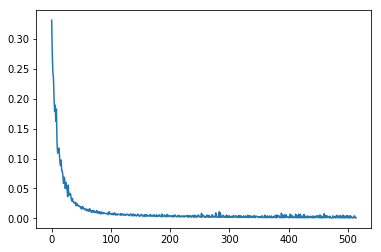

In [17]:
plt.plot(batch_history.losses[10:])
plt.show()

In [18]:
dirs_test = os.listdir('/Users/mac/Downloads/digits-classification-with-cnn/test/test')

In [19]:
qw = []
for file in dirs_test:
    qw.append(file)
q = '/Users/mac/Downloads/digits-classification-with-cnn/test/test/'
r = q + qw[0]
rt = np.empty(len(qw))
for i in range(len(qw)):
    k = qw[i][0]
    j = 1
    while qw[i][j] != '.':
        k = k + qw[i][j]
        j = j + 1
    rt[i] = int(k)
    #print("k=", k)
    #print("rt[i] = ",rt[i])
tr = [int(i) for i in rt]
image_test = np.array(Image.open(r))
image_test = []
for file in dirs_test:
    r = q + file
    image_test.append(r)

In [20]:
np.array(Image.open(image_test[7])).shape

(28, 28, 3)

In [21]:
test = np.random.random((len(image_test), 28, 28, 3))
for i in range(len(image_test)):
    img = cv2.imread(image_test[i])
    test[i] = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

In [22]:
predict = model.predict(test)

In [23]:
num = np.empty(predict.shape[0])
for i in range(predict.shape[0]):
    k = predict[i].max()
    for j in range(10):
        if k == predict[i][j]:
            num[i] = int(j)
result = [int(i) for i in num]

In [25]:
pd.DataFrame({'Predicted': result, 'Id': tr}).to_csv('/Users/mac/Downloads/digits-classification-with-cnn/solution.csv', index = False)